In [2]:
import numpy as np
import pandas as pd
from IMPJ import DataProcessor
import random
import matplotlib.pyplot as plt
from os.path import basename, exists
import matplotlib as mpl

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
        
download('https://github.com/AllenDowney/AstronomicalData/raw/main/' + 'az-paper-twocol.mplstyle')
plt.style.use('./az-paper-twocol.mplstyle')


In [3]:
data = pd.read_csv('..\\..\\Fermi-LAT Data\\fl_numericalonly_nopositional_withclasses.csv',index_col=0)
rdgdata = pd.read_csv('..\\..\\Fermi-LAT Data\\ML_Results_withrdg.csv',index_col=0)
bcudata=pd.read_csv('..\\..\\Fermi-LAT Data\\imputed_bcuonly.csv')
print(rdgdata.columns)

Index(['Frac_Variability', 'HR_24', 'Signif_Avg', 'Pivot_Energy', 'HR_35',
       'HR_37', 'LP_Flux_Density', 'HR_36', 'HR_47', 'HR_57',
       'PLEC_ExpfactorS', 'HR_46', 'PL_Index', 'ASSOC_PROB_LR', 'CLASS1',
       'y_pred', 'y_probs_bll', 'y_probs_fsrq'],
      dtype='object')


In [4]:
  '''
        In 'data' all unknown BCUs are assigned 0. 
        All BLLs are assigned 1 and all FSRQs are assigned 2.
        Radio Galaxies = 3 and Other = 4

        The function will mask all values except the 2 desired classes
        '''

pl_index = np.array(data['PL_Index'])
lp_index = np.array(data['LP_Index'])
plec_index = np.array(data['PLEC_IndexS'])
pl = np.array(data['PL'])
lp = np.array(data['LP'])
plec = np.array(data['PLEC'])
classes = np.array(data['CLASS1'])
pivotenergies = np.array(data['Pivot_Energy'])
var_index = np.array(data['Variability_Index'])

index = np.zeros(len(pl_index))
for i in range(0,len(pl_index)):
    if pl[i] == 1:
        index[i] = pl_index[i]
    elif lp[i] == 1:
        index[i] = lp_index[i]
    elif plec[i] == 1:
        index[i] == plec_index[i]
    else:
        print('Error')

rdg = np.array([])
bll = np.array([])
fsrq = np.array([])
rdgpe = np.array([]) #rdg pivot energy
bllpe = np.array([])
fsrqpe=np.array([])
rdgpreds = np.array([])
bllpreds = np.array([])
fsrqpreds = np.array([])
bll_vi = np.array([])
fsrq_vi = np.array([])
rdg_vi = np.array([])

for i in range(0,len(classes)):
    if classes[i] == 1:
        bll = np.append(bll,index[i])
        bllpe = np.append(bllpe,pivotenergies[i])
        bll_vi = np.append(bll_vi,var_index[i])
    elif classes[i] == 2:
        fsrq = np.append(fsrq,index[i])
        fsrqpe = np.append(fsrqpe,pivotenergies[i])
        fsrq_vi = np.append(fsrq_vi,var_index[i])
    elif classes[i] == 3:
        rdg = np.append(rdg,index[i])
        rdgpe = np.append(rdgpe,pivotenergies[i])
        rdg_vi = np.append(rdg_vi,var_index[i])
    elif classes[i] == 4:
        pass
    else:
        print('Error')

Text(0, 0.5, 'Population Density')

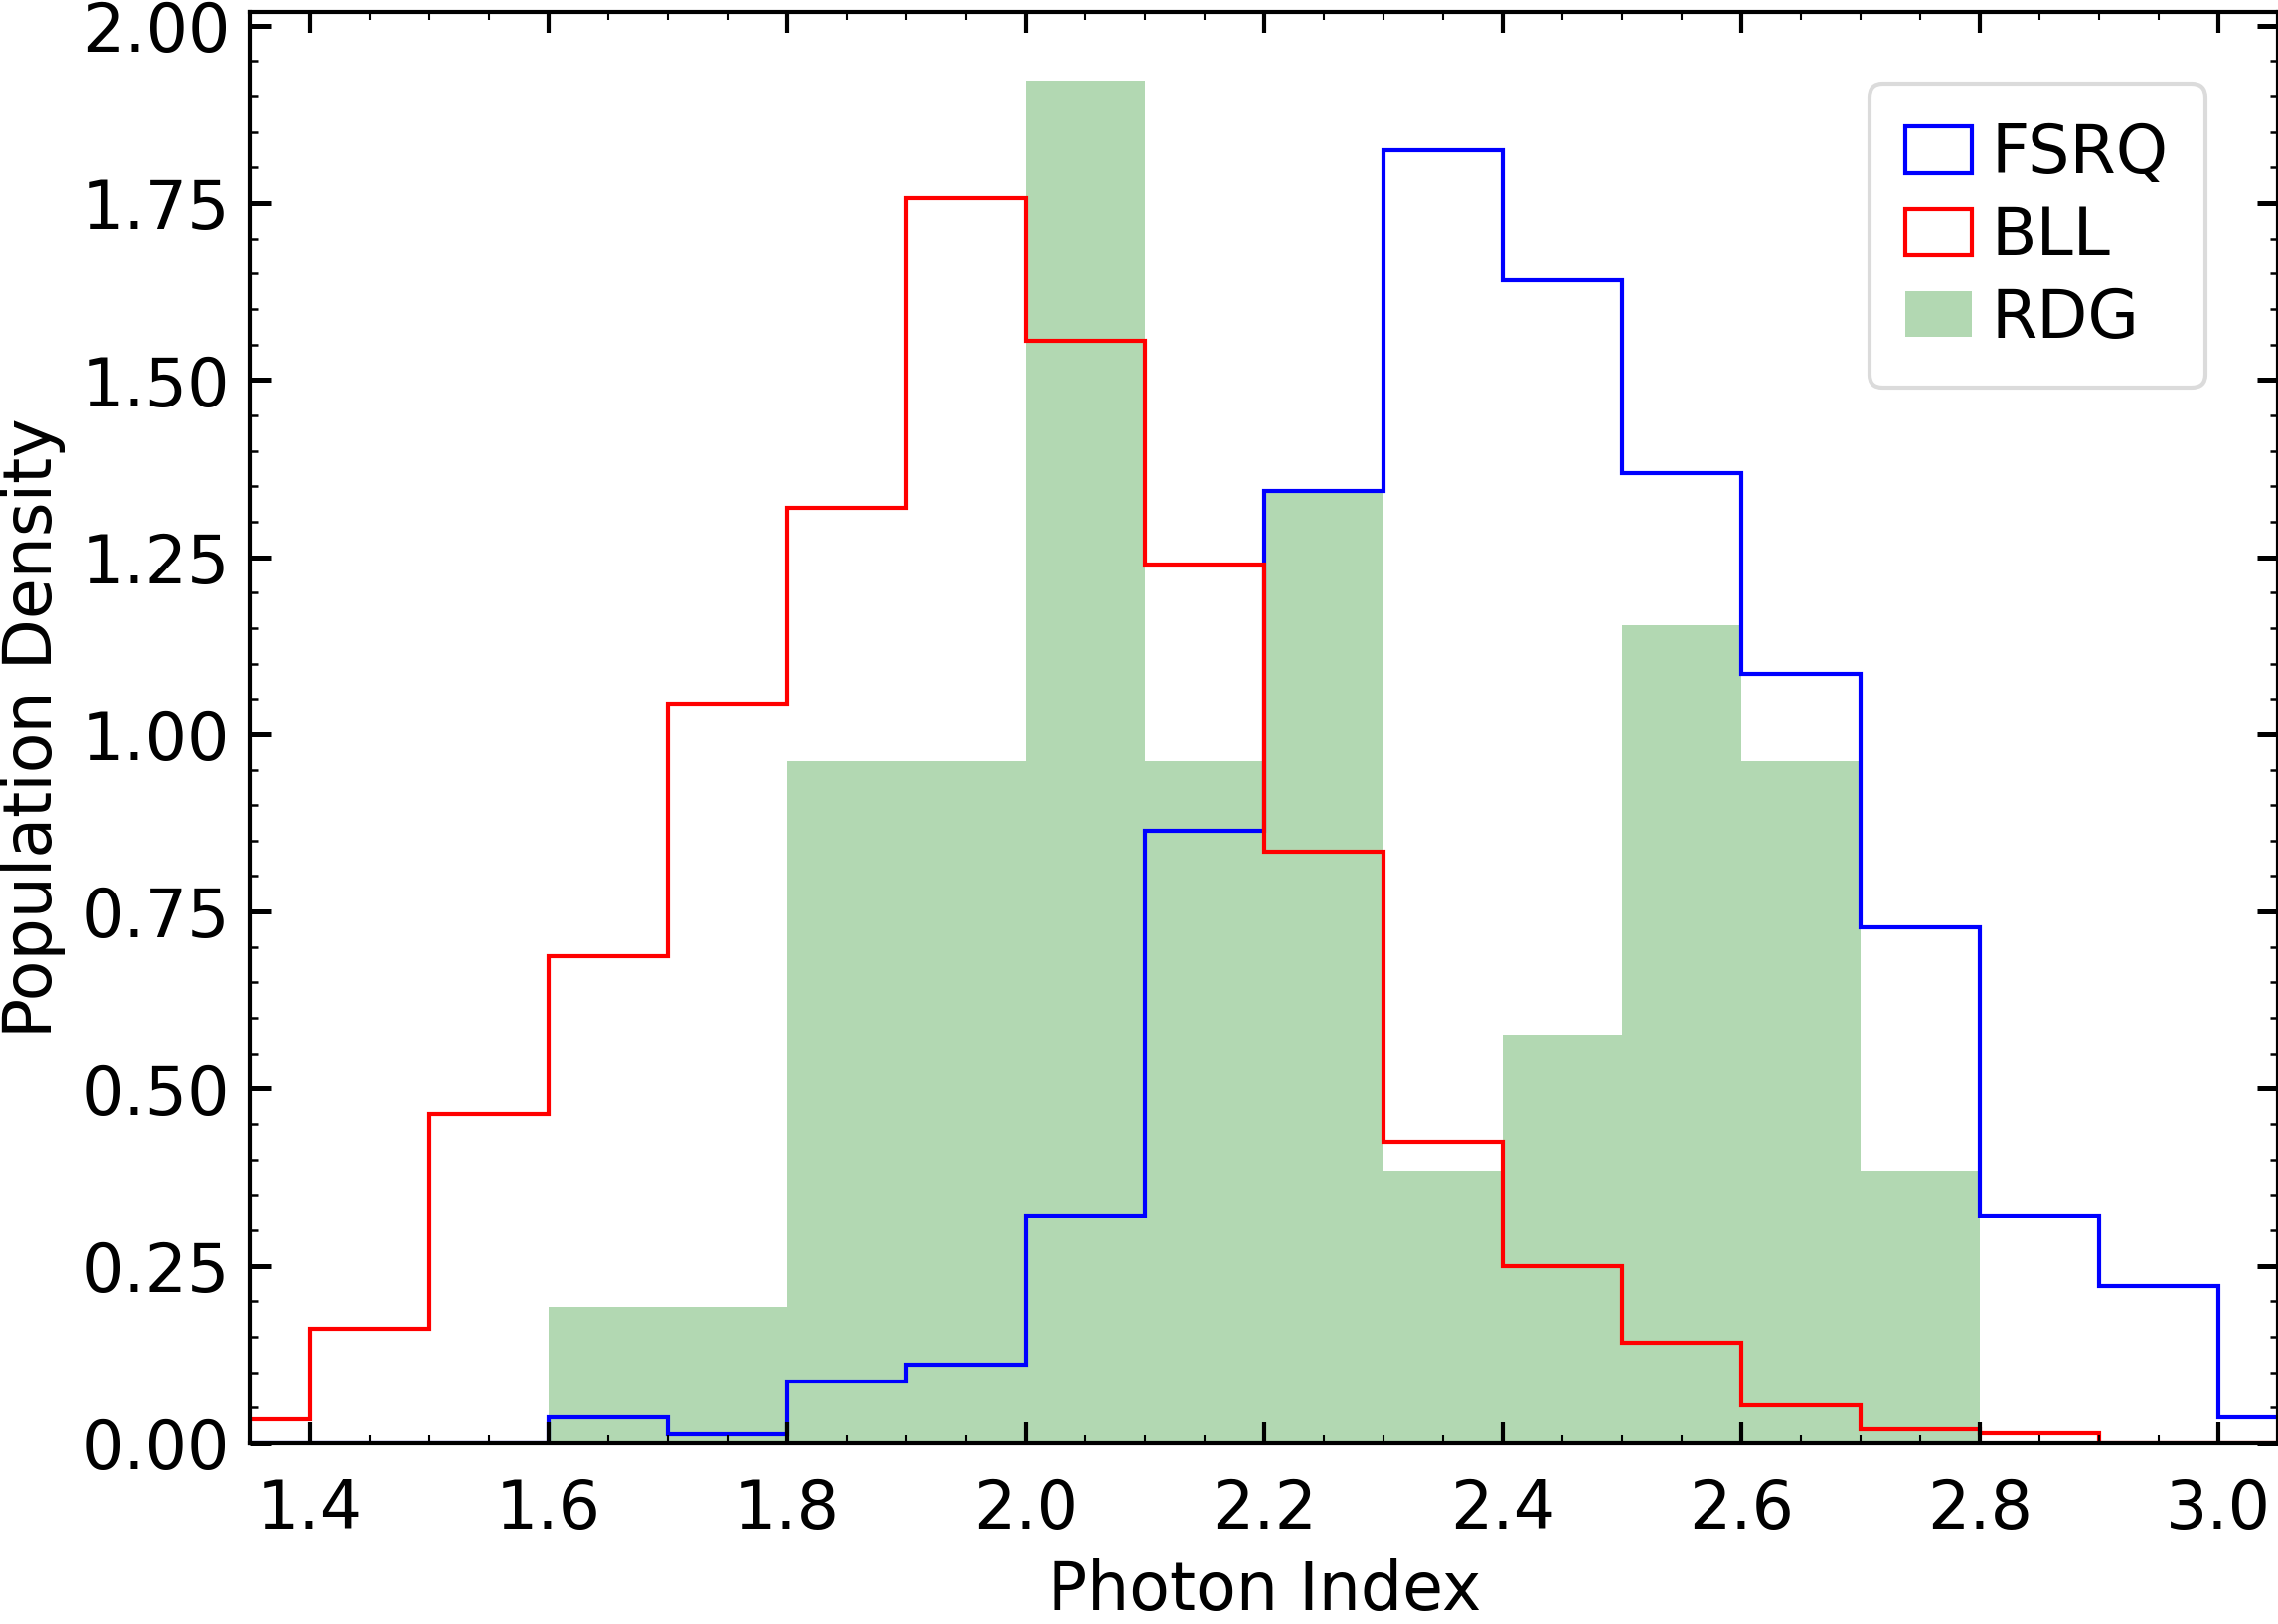

In [5]:

fig, ax = plt.subplots(figsize = (8,6),dpi=300)
#ax2 = ax.twinx()
ax.hist(fsrq,histtype='step',bins = np.arange(1.3,3.2,0.1),color='blue',density=True,label = 'FSRQ')
ax.hist(bll,histtype='step',bins = np.arange(1.3,3.2,0.1),color='red',density=True,label='BLL')
ax.hist(rdg,histtype='stepfilled',bins = np.arange(1.3,3.2,0.1),color='green',density=True,alpha=0.3,label='RDG')
ax.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_xbound(1.35,3.05)
ax.set_xlabel('Photon Index',fontsize=16)
ax.set_ylabel('Population Density',fontsize=16)

Text(0.5, 0, 'Log(Pivot Energy)')

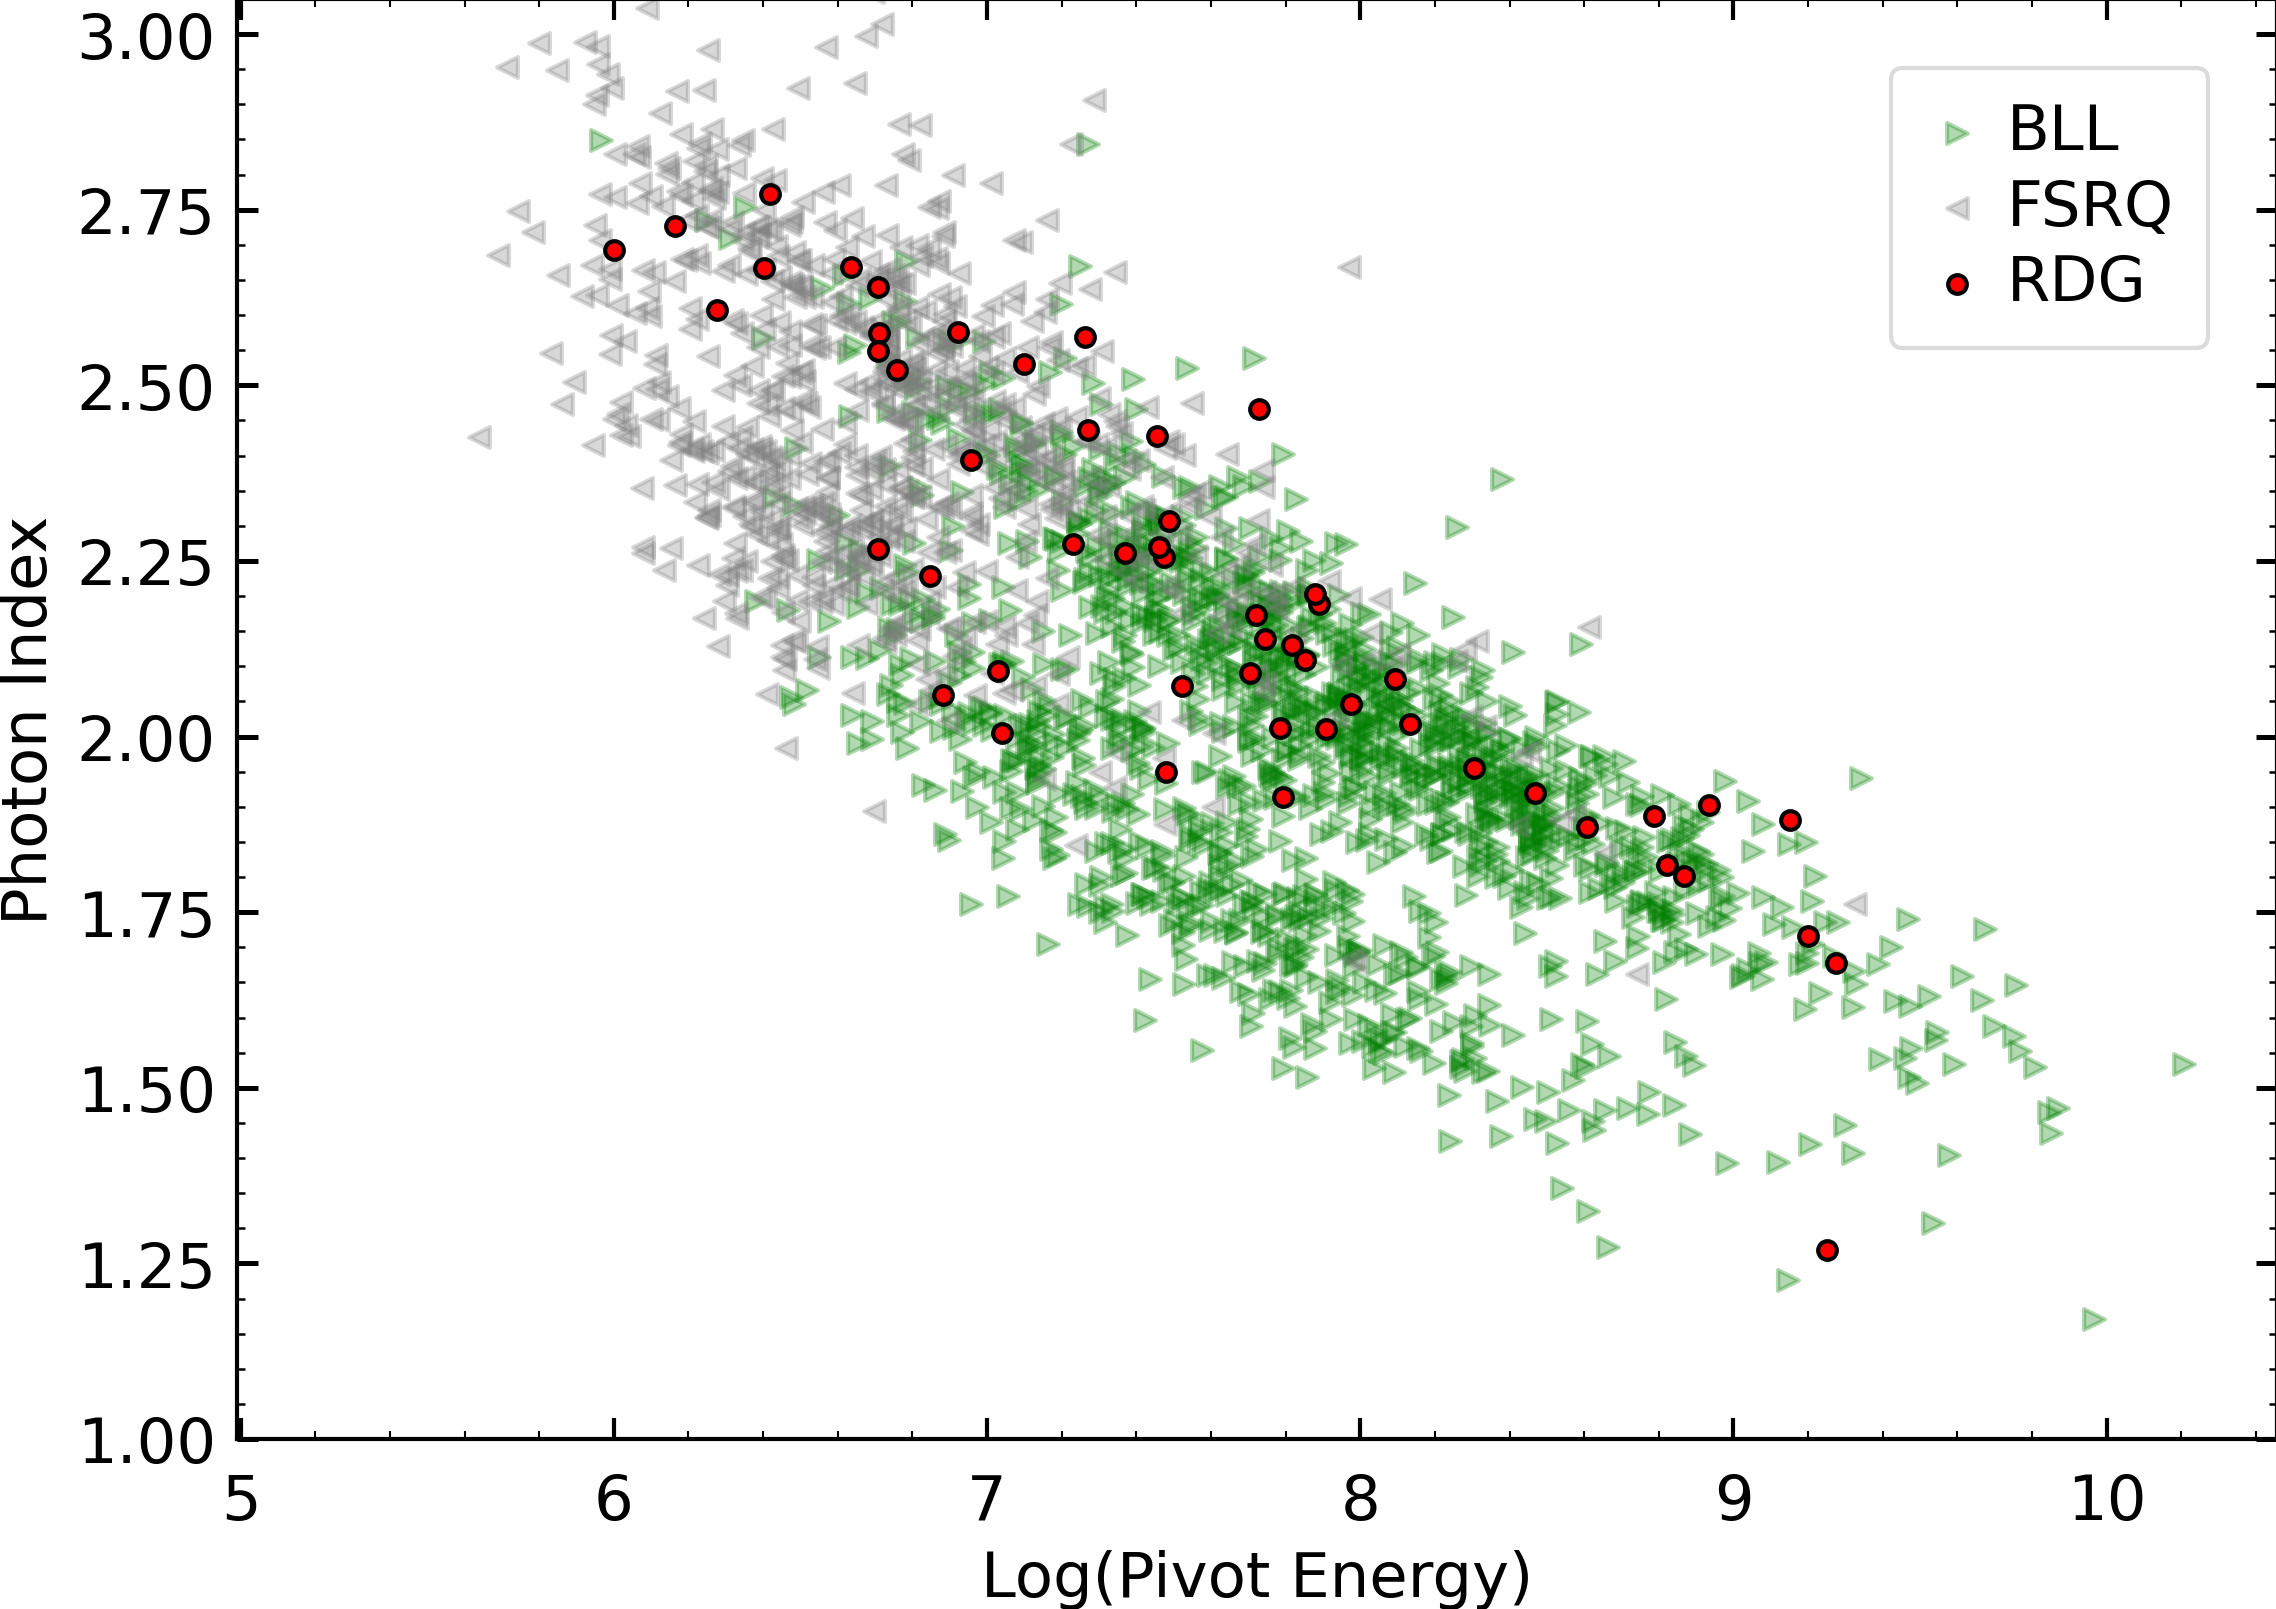

In [6]:
fig, ax = plt.subplots(figsize=(8,6),dpi=300)

ax.scatter(np.log(bllpe),bll,color='green',marker = '>',alpha=0.3,label='BLL')
ax.scatter(np.log(fsrqpe),fsrq,color='grey',marker = '<',alpha = 0.3,label='FSRQ')
ax.scatter(np.log(rdgpe),rdg,color='red',marker='o',s=20,edgecolors='black',label='RDG')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_ybound(1,3.05)
ax.legend(fontsize=15)
ax.set_ylabel('Photon Index',fontsize=15)
ax.set_xlabel('Log(Pivot Energy)',fontsize=15)

Text(0.5, 0, 'Variability Index')

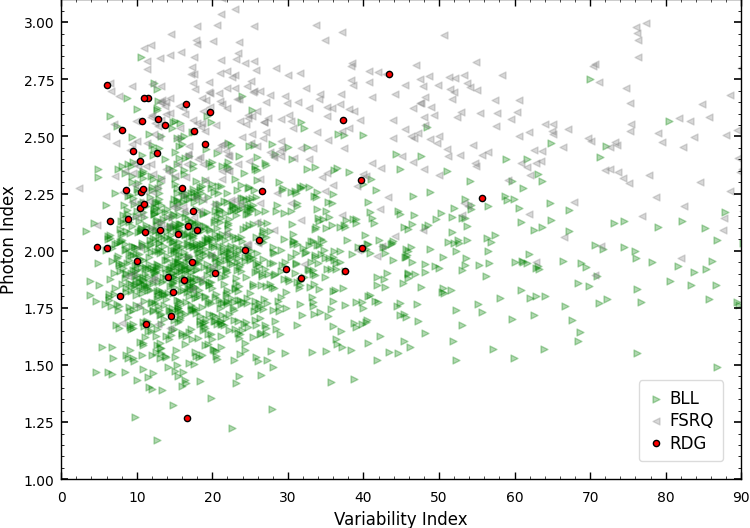

In [7]:
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(bll_vi,bll,color='green',marker = '>',alpha=0.3,label='BLL')
ax.scatter(fsrq_vi,fsrq,color='grey',marker = '<',alpha = 0.3,label='FSRQ')
ax.scatter(rdg_vi,rdg,color='red',marker='o',s=20,edgecolors='black',label='RDG')
ax.set_ybound(1,3.10)
ax.set_xbound(0,90)
ax.legend(fontsize=12)
ax.set_ylabel('Photon Index',fontsize=12)
ax.set_xlabel('Variability Index',fontsize=12)

11.472499850214467


FileNotFoundError: [Errno 2] No such file or directory: '..\\Plots\\Distribution Histograms\\Variability_Index.png'

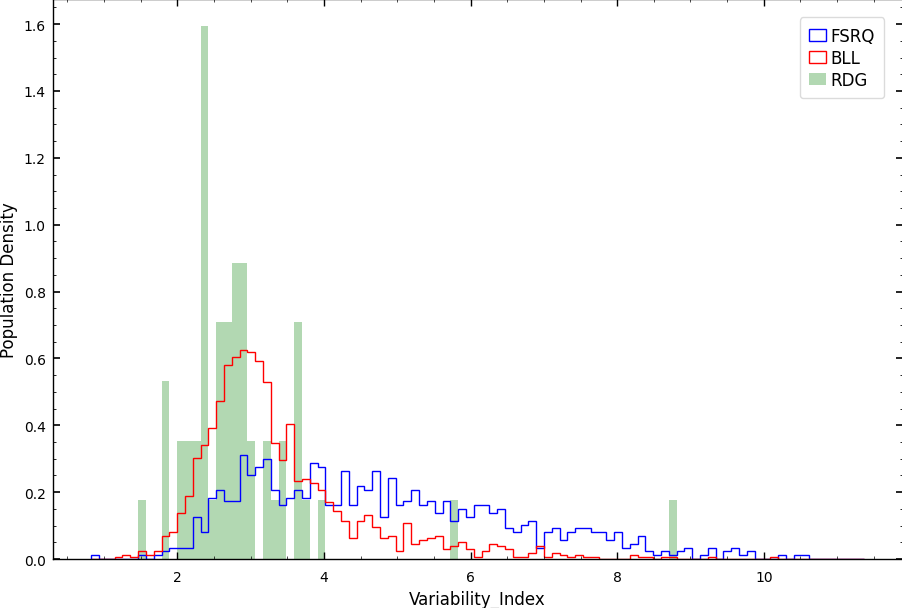

In [8]:
feature = 'Variability_Index'
feat = np.array(data[feature])
feat=np.log(feat)
classes = np.array(data['CLASS1'])
bll_feat = np.array([])
fsrq_feat = np.array([])
rdg_feat = np.array([])
for i in range(0,len(classes)):
    if classes[i] == 1:
        bll_feat = np.append(bll_feat,feat[i])
    elif classes[i] == 2:
        fsrq_feat = np.append(fsrq_feat,feat[i])
    elif classes[i] == 3:
        rdg_feat = np.append(rdg_feat,feat[i])
    elif classes[i] == 4:
        pass
    else:
        print('Error')


feat[feat==-np.inf] = np.nan
feat = feat[~np.isnan(feat)]                
n = np.min(feat)
N = np.max(feat)

n=n
N=N
step = abs((N-n)/100)
print(N)

fig, ax = plt.subplots(figsize = (10,7))
#ax2 = ax.twinx()
ax.hist(fsrq_feat,histtype='step',bins = np.arange(n,N,step),color='blue',density=True,label = 'FSRQ')
ax.hist(bll_feat,histtype='step',bins = np.arange(n,N,step),color='red',density=True,label='BLL')
ax.hist(rdg_feat,histtype='stepfilled',bins = np.arange(n,N,step),color='green',density=True,alpha=0.3,label='RDG')
ax.legend(fontsize=12)
#ax.set_xbound(1.35,3.05)
ax.set_xlabel(feature,fontsize=12)
ax.set_ylabel('Population Density',fontsize=12)
plt.savefig('..\\Plots\\Distribution Histograms\\'+feature+'.png')

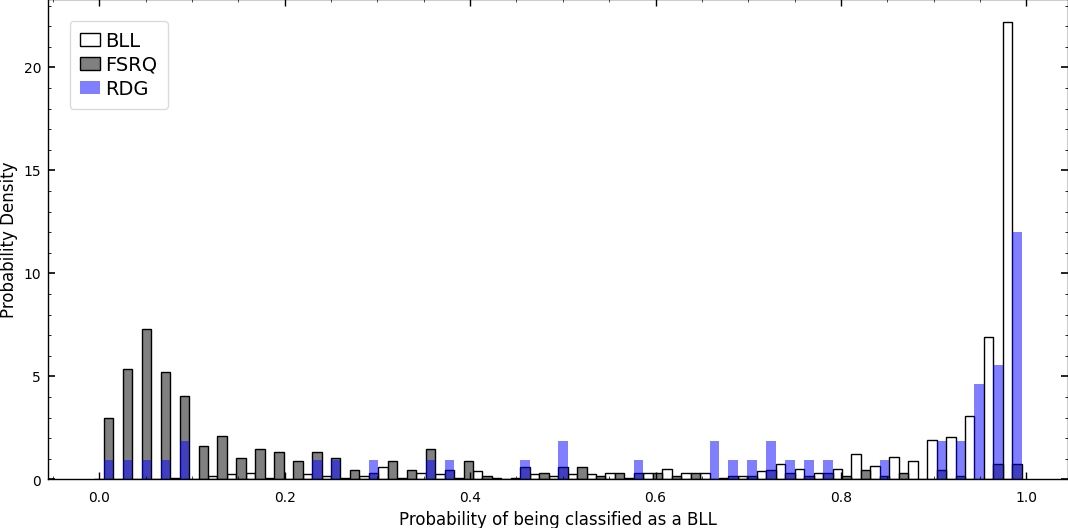

In [ ]:
y_probs = np.array(rdgdata['y_probs_bll'])
classes = np.array(rdgdata['CLASS1'])
bllprobs = np.array([])
fsrqprobs = np.array([])
rdgprobs = np.array([])
allprobs=np.array([])

for i in range(0,len(classes)):
    if classes[i] == 0:
        bllprobs=np.append(bllprobs,y_probs[i])
        allprobs=np.append(allprobs,y_probs[i])
    elif classes[i] == 1:
        fsrqprobs=np.append(fsrqprobs,y_probs[i])
        allprobs=np.append(allprobs,y_probs[i])
    elif classes[i] == 3:
        rdgprobs = np.append(rdgprobs,y_probs[i])
    else:
        print('Error')

fig, ax = plt.subplots(figsize=(12,6))
ax.hist(bllprobs,density=True,histtype='bar',bins = np.linspace(0,1,50),rwidth=0.5,align='left',
        edgecolor='black',color='white',label='BLL')
ax.hist(fsrqprobs,density=True,histtype='bar',bins = np.linspace(0,1,50),rwidth=0.5,align='mid',
        edgecolor='black',color='gray',label='FSRQ')
ax.hist(rdgprobs,density=True,histtype='bar',bins = np.linspace(0,1,50),color='blue',alpha=0.5,rwidth=0.5,
        label='RDG')
ax.set_ylabel('Probability Density',fontsize=12)
ax.set_xlabel('Probability of being classified as a BLL',fontsize=12)
ax.legend(fontsize = 14)


In [ ]:
btwn1090 = np.array([])
btwn2080 = np.array([])
btwn3070 = np.array([])
btwn4060 = np.array([])

for i in range(0,len(y_probs)):
    if y_probs[i] > 0.4 and y_probs[i] < 0.6:
        btwn4060 = np.append(btwn4060,classes[i])
        btwn3070 = np.append(btwn3070,classes[i])
        btwn2080 = np.append(btwn2080,classes[i])
        btwn1090 = np.append(btwn1090,classes[i])
    elif y_probs[i] > 0.3 and y_probs[i] < 0.7:
        btwn3070 = np.append(btwn3070,classes[i])
        btwn2080 = np.append(btwn2080,classes[i])
        btwn1090 = np.append(btwn1090,classes[i])    
    elif y_probs[i] > 0.2 and y_probs[i] < 0.8:
        btwn2080 = np.append(btwn2080,classes[i])
        btwn1090 = np.append(btwn1090,classes[i])
    elif y_probs[i] > 0.1 and y_probs[i] < 0.9:
        btwn1090 = np.append(btwn1090,classes[i])

rdg1090 = np.count_nonzero(btwn1090 == 3)
rdg2080 = np.count_nonzero(btwn2080 == 3)
rdg3070 = np.count_nonzero(btwn3070 == 3)
rdg4060 = np.count_nonzero(btwn4060 == 3)
rdgoverall = np.count_nonzero(classes == 3)

percent1090 = (rdg1090/len(btwn1090))*100
percent2080 = (rdg2080/len(btwn2080))*100
percent3070 = (rdg3070/len(btwn3070))*100
percent4060 = (rdg4060/len(btwn4060))*100
percentoverall = (rdgoverall/len(classes))*100

print(f'Between probabilities of 0.1 and 0.9, {rdg1090} RDGs make up {percent1090}% of the sample of {len(btwn1090)}')
print(f'Between probabilities of 0.2 and 0.8, {rdg2080} RDGs make up {percent2080}% of the sample of {len(btwn2080)}')
print(f'Between probabilities of 0.3 and 0.7, {rdg3070} RDGs make up {percent3070}% of the sample of {len(btwn3070)}')
print(f'Between probabilities of 0.4 and 0.6, {rdg4060} RDGs make up {percent4060}% of the sample of {len(btwn4060)}')
print(f'The overall percentage of RDGs in the sample is {percentoverall}% of {len(classes)}')

''' RUN THIS CELL IN ORDER. THE CELL BELOW IS CAUSING PROBLEMS!!!!!!!!!!!!!!!!!!!!!!!!!!'''

Between probabilities of 0.1 and 0.9, 19 RDGs make up 5.775075987841945% of the sample of 329
Between probabilities of 0.2 and 0.8, 18 RDGs make up 8.866995073891626% of the sample of 203
Between probabilities of 0.3 and 0.7, 9 RDGs make up 7.43801652892562% of the sample of 121
Between probabilities of 0.4 and 0.6, 4 RDGs make up 7.017543859649122% of the sample of 57
The overall percentage of RDGs in the sample is 5.4303278688524586% of 976


' RUN THIS CELL IN ORDER. THE CELL BELOW IS CAUSING PROBLEMS!!!!!!!!!!!!!!!!!!!!!!!!!!'

Text(0, 0.5, 'Fraction of Radio Galaxies')

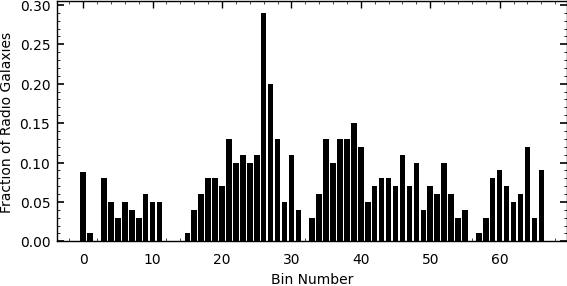

In [ ]:
rdgdata = pd.read_csv('..\\Fermi-LAT Data\\ML_Results_withrdg.csv',index_col=0)

y_probs=np.array([])
classes=np.array([])

for i in range(1,10):
    sar = pd.read_csv('..\\Search Area Results\\iteration_'+str(i)+'_raw.csv')
    y_probs = np.append(y_probs,np.array(sar['y_probs_bll']))
    classes = np.append(classes,np.array(sar['CLASS1']))
y_probs_ascending = np.sort(y_probs)
y_probs_descending = np.flip(y_probs_ascending)

count = 0
bin_size = 100
cutoff_prob_a = np.array([0])
cutoff_prob_d = np.array([1])


for i in range(0,len(y_probs)):
    count+=1
    if count >= bin_size:
        cutoff_prob_a = np.append(cutoff_prob_a,y_probs_ascending[i])
        cutoff_prob_d = np.append(cutoff_prob_d,y_probs_descending[i])
        count = 0

n_bins = len(cutoff_prob_a)-1

bins = pd.DataFrame((np.array([y_probs,classes,np.zeros(len(classes)),np.zeros(len(classes))]).T),
                    columns=['y_probs','classes','bin_n_ascending','bin_n_descending'])

for i in range(0,n_bins):
    for k in range(0,len(y_probs)):
        if y_probs[k] >= cutoff_prob_a[i] and y_probs[k] < cutoff_prob_a[i+1]:
            bins['bin_n_ascending'][k] = i
        if y_probs[k] <= cutoff_prob_d[i] and y_probs[k] > cutoff_prob_d[i+1]:
            bins['bin_n_descending'][k] = i

lowerbounds = np.delete(cutoff_prob_a,-1)
upperbounds = np.delete(cutoff_prob_a,0)
totals_asc = pd.DataFrame((np.array([np.zeros(n_bins),lowerbounds, upperbounds,np.zeros(n_bins),np.zeros(n_bins),np.zeros(n_bins)]).T),
                                columns=['Bin (asc)','Lower Bound','Upper Bound','RDG Count','Total Count','Frac'])


for i in range(0,n_bins): # iterates over each bin in the set
        n_rdg = bins.loc[(bins['bin_n_ascending']==i) & (bins['classes']==3)]
        n_bll = bins.loc[(bins['bin_n_ascending']==i) & (bins['classes']==0)]
        n_fsrq = bins.loc[(bins['bin_n_ascending']==i) & (bins['classes']==1)]
        tot = len(n_rdg)+len(n_bll)+len(n_fsrq)
        #print(f'n_rdg is {len(n_rdg)} from {tot} in ascending bin {i}')
        totals_asc['Bin (asc)'][i] = i
        totals_asc['RDG Count'][i] = len(n_rdg)
        totals_asc['Total Count'][i] = tot
        totals_asc['Frac'][i] = len(n_rdg)/tot

#totals_asc.to_csv('..\\Search Area Results\\iteration_10')
fig, ax = plt.subplots()
ax.bar(totals_asc['Bin (asc)'],totals_asc['Frac'])
ax.set_xlabel('Bin Number')
ax.set_ylabel('Fraction of Radio Galaxies')


In [ ]:
rdgdata = pd.read_csv('..\\Search Area Results\\iteration_1_raw.csv',index_col=0)

results_totals = pd.DataFrame()
results_rdgs = pd.DataFrame()

for n in range(1,11):
    
    results_totals['total count '+str(n)] = np.zeros(10)
    results_rdgs['rdg count '+str(n)] = np.zeros(10)
    sar = pd.read_csv('..\\Search Area Results\\iteration_'+str(n)+'_raw.csv')
    y_probs=np.array([])
    classes=np.array([])
    y_probs = np.append(y_probs,np.array(sar['y_probs_bll']))
    classes = np.append(classes,np.array(sar['CLASS1']))
    y_probs_ascending = np.sort(y_probs)
    y_probs_descending = np.flip(y_probs_ascending)

    count = 0
    bin_size = len(y_probs)/10
    cutoff_prob_a = np.array([0])
    cutoff_prob_d = np.array([1])

    cutoff_prob_a = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    n_bins = len(cutoff_prob_a)-1
    bins = pd.DataFrame((np.array([y_probs,classes,np.zeros(len(classes)),np.zeros(len(classes))]).T),
                        columns=['y_probs','classes','bin_n_ascending','bin_n_descending'])

    for i in range(0,n_bins):
        for k in range(0,len(y_probs)):
            if y_probs[k] >= cutoff_prob_a[i] and y_probs[k] < cutoff_prob_a[i+1]:
                bins['bin_n_ascending'][k] = i
            
    lowerbounds = np.delete(cutoff_prob_a,-1)
    upperbounds = np.delete(cutoff_prob_a,0)
    totals_asc = pd.DataFrame((np.array([np.zeros(n_bins),lowerbounds, upperbounds,np.zeros(n_bins),np.zeros(n_bins),np.zeros(n_bins)]).T),
                                    columns=['Bin (asc)','Lower Bound','Upper Bound','RDG Count','Total Count','Frac'])


    for i in range(0,n_bins): # iterates over each bin in the set
            n_rdg = bins.loc[(bins['bin_n_ascending']==i) & (bins['classes']==3)]
            n_bll = bins.loc[(bins['bin_n_ascending']==i) & (bins['classes']==0)]
            n_fsrq = bins.loc[(bins['bin_n_ascending']==i) & (bins['classes']==1)]
            tot = len(n_rdg)+len(n_bll)+len(n_fsrq)
            #print(f'n_rdg is {len(n_rdg)} from {tot} in ascending bin {i}')
            totals_asc['Bin (asc)'][i] = i
            totals_asc['RDG Count'][i] = len(n_rdg)
            totals_asc['Total Count'][i] = tot
            totals_asc['Frac'][i] = len(n_rdg)/tot
 
    for i in range(0,n_bins):
        totalcount=0
        count=0
        count = bins['bin_n_ascending'].value_counts()[i]
        rdgcount = len(bins.loc[(bins['bin_n_ascending']==i) & (bins['classes']==3)])
    
        results_totals['total count '+str(n)][i] = count
        results_rdgs['rdg count '+str(n)][i] = rdgcount

    #totals_asc.to_csv('..\\Search Area Results\\iteration_10')


In [ ]:

#find fractional error 
dbb2 = results_totals.sem(axis=1)/results_totals.mean(axis=1)
dcc2 = results_rdgs.sem(axis=1)/results_totals.mean(axis=1)
daa2 = dbb2 + dcc2 # (delta a over a) squared
print(daa2)

fig, ax = plt.subplots(dpi=300)
ax.bar(totals_asc['Bin (asc)']/10,totals_asc['Frac'],align='edge',width=0.1,edgecolor='black',color='white',
       yerr=daa2*totals_asc['Frac'],capsize=3,ecolor='red')
ax.set_xlabel('Probability')
ax.set_ylabel('Fraction of Radio Galaxies')


NameError: name 'results_totals' is not defined

53.0


AttributeError: Rectangle.set() got an unexpected keyword argument 'style'

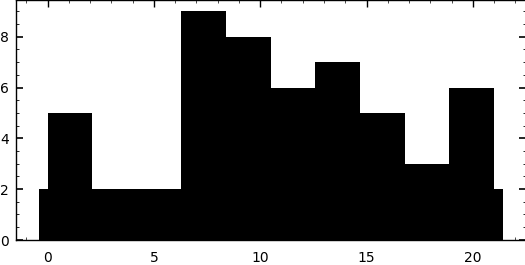

In [ ]:
df = pd.read_csv('..\\Search Area Results\\iteration_1_raw.csv')
rdgprobs = pd.DataFrame()
allprobs = pd.DataFrame(np.array([np.zeros(len(df))]).T,columns=['CLASS'])
allprobs['sum']=np.zeros(len(allprobs))
for i in range(1,11):
    df = pd.read_csv('..\\Search Area Results\\iteration_'+str(i)+'_raw.csv')
    rdgprobs['iteration_' +str(i)] = df.loc[df['CLASS1']==3]['y_probs_bll']
    allprobs['iteration_'+str(i)] = df['y_probs_bll']
    allprobs['sum'] = allprobs['sum'] + df['y_probs_bll']
allprobs['AVG'] = allprobs['sum']/10

allprobs['CLASS']=df['CLASS1']
    #rdgprobs = rdgprobs.reset_index(drop=True)
probarray=np.empty(len(allprobs))

for i in range(0,len(allprobs)):
    if allprobs['CLASS'][i] == 0 or allprobs['CLASS'][i] == 1:
        probarray[i]=allprobs['iteration_10'][i]
    elif allprobs['CLASS'][i] == 3:
        probarray[i]=allprobs['AVG'][i]

#mean = np.array(rdgprobs.mean(axis=1))
#stderr = np.array(rdgprobs.sem(axis=1))

#means = pd.DataFrame(np.array([mean,stderr]).T,columns=['mean','std err'])
#means = means.sort_values(by='mean',ascending=True)

#fig, ax = plt.subplots(figsize=(10,8))
y_probs=probarray
y_probs_ascending=np.sort(probarray)
y_probs_descending=np.flip(y_probs_ascending)
classes=np.array(allprobs['CLASS'])
count = 0
bin_size = 33
cutoff_prob_a = np.array([0])
cutoff_prob_d = np.array([1])
#print(y_probs_ascending)

for i in range(0,len(y_probs)):
    count+=1
    if count >= bin_size:
        cutoff_prob_a = np.append(cutoff_prob_a,y_probs_ascending[i])
        cutoff_prob_d = np.append(cutoff_prob_d,y_probs_descending[i])
        count = 0
        
n_bins = len(cutoff_prob_a)-1

bins = pd.DataFrame((np.array([y_probs,classes,np.zeros(len(classes)),np.zeros(len(classes))]).T),
                    columns=['y_probs','classes','bin_n_ascending','bin_n_descending'])

for i in range(0,n_bins):
    for k in range(0,len(y_probs)):
        if y_probs[k] >= cutoff_prob_a[i] and y_probs[k] < cutoff_prob_a[i+1]:
            bins['bin_n_ascending'][k] = i
        if y_probs[k] <= cutoff_prob_d[i] and y_probs[k] > cutoff_prob_d[i+1]:
            bins['bin_n_descending'][k] = i

lowerbounds = np.delete(cutoff_prob_a,-1)
upperbounds = np.delete(cutoff_prob_a,0)
totals_asc = pd.DataFrame((np.array([np.zeros(n_bins),lowerbounds, upperbounds,np.zeros(n_bins),np.zeros(n_bins),np.zeros(n_bins)]).T),
                                columns=['Bin (asc)','Lower Bound','Upper Bound','RDG Count','Total Count','Frac'])


for i in range(0,n_bins): # iterates over each bin in the set
        n_rdg = bins.loc[(bins['bin_n_ascending']==i) & (bins['classes']==3)]
        n_bll = bins.loc[(bins['bin_n_ascending']==i) & (bins['classes']==0)]
        n_fsrq = bins.loc[(bins['bin_n_ascending']==i) & (bins['classes']==1)]
        tot = len(n_rdg)+len(n_bll)+len(n_fsrq)
        #print(f'n_rdg is {len(n_rdg)} from {tot} in ascending bin {i}')
        totals_asc['Bin (asc)'][i] = i
        totals_asc['RDG Count'][i] = len(n_rdg)
        totals_asc['Total Count'][i] = tot
        totals_asc['Frac'][i] = len(n_rdg)/tot


print(totals_asc['RDG Count'].sum())
dummydata = np.array([])
for i in range(0,len(totals_asc)):
    dummydata = np.append(dummydata,totals_asc['Bin (asc)'][i]*np.ones(int(totals_asc['RDG Count'][i])))



fig, ax = plt.subplots()
ax.bar(totals_asc['Bin (asc)'],totals_asc['RDG Count'])
ax.hist(dummydata,style='stepfilled')
ax.set_xlabel('Bin Number')
ax.set_ylabel('Fraction of Radio Galaxies')
totals_asc.to_csv('totals_asc.csv')

In [ ]:

from scipy.stats import fit, norm, chisquare, goodness_of_fit, lognorm, t,beta, cosine, uniform
from scipy.optimize import curve_fit

def normal(x,mu,sigma):
    return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-0.5*((x-mu)/sigma)**2)

dummydata = np.array([])

for i in range(0,len(totals_asc)):
    dummydata = np.append(dummydata,totals_asc['Bin (asc)'][i]*np.ones(int(totals_asc['RDG Count'][i])))

xs = np.arange(0,len(totals_asc),1)
fitresults = goodness_of_fit(norm,dummydata,statistic='ks')
fitresultsdf=pd.DataFrame([[fitresults[0],fitresults[1],fitresults[2]]],columns=['Fit Results','KS Statistic','P-Value'])
fitresultsdf.to_csv('fit_results.csv')
plt.show()

#print(np.max(dummydata))

Text(0.5, 0, 'Probability of being classified as a BLL')

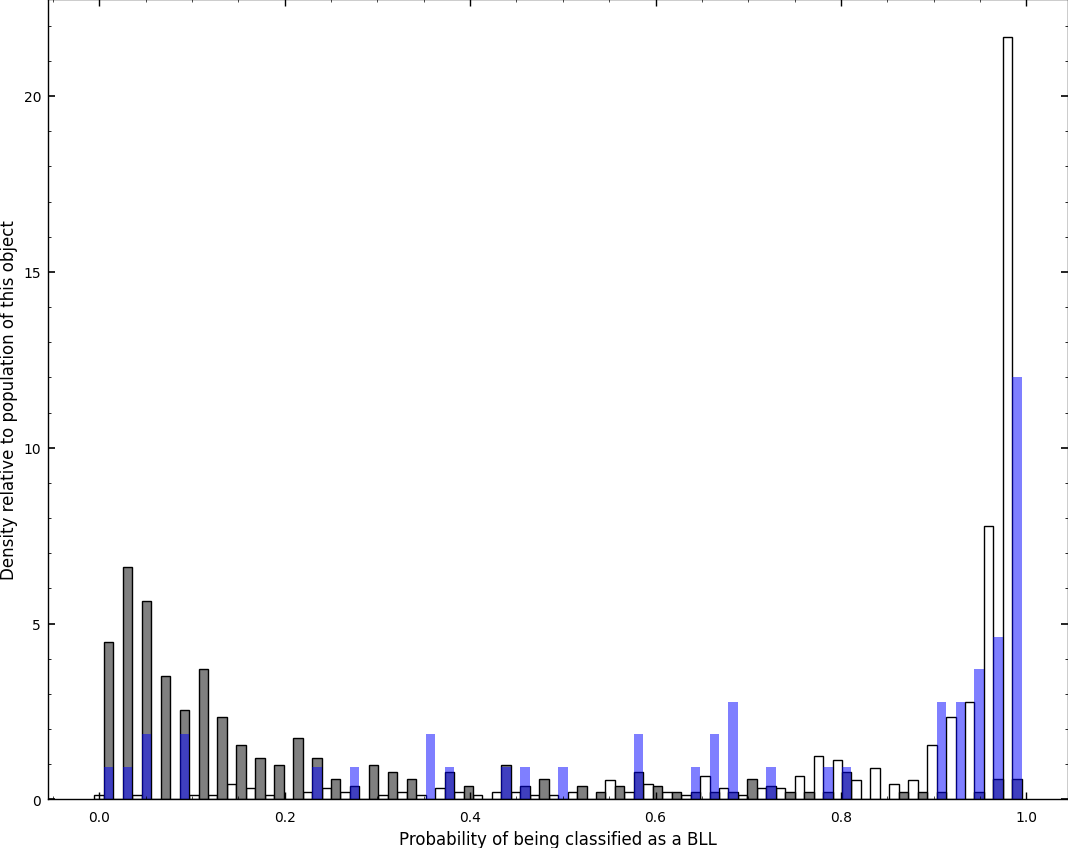

In [ ]:


bllprobs = np.array([])
fsrqprobs = np.array([])
rdgprobs = np.array([])
allprobs=np.array([])

for i in range(0,len(classes)):
    if classes[i] == 0:
        bllprobs=np.append(bllprobs,y_probs[i])
        allprobs=np.append(allprobs,y_probs[i])
    elif classes[i] == 1:
        fsrqprobs=np.append(fsrqprobs,y_probs[i])
        allprobs=np.append(allprobs,y_probs[i])
    elif classes[i] == 3:
        rdgprobs = np.append(rdgprobs,y_probs[i])
    else:
        print('Error')

fig, ax = plt.subplots(figsize=(12,10))
ax.hist(bllprobs,density=True,histtype='bar',bins = np.linspace(0,1,50),rwidth=0.5,align='left',edgecolor='black',color='white')
ax.hist(fsrqprobs,density=True,histtype='bar',bins = np.linspace(0,1,50),rwidth=0.5,align='mid',edgecolor='black',color='gray')
ax.hist(rdgprobs,density=True,histtype='bar',bins = np.linspace(0,1,50),color='blue',alpha=0.5,rwidth=0.5)
ax.set_ylabel('Density relative to population of this object',fontsize=12)
ax.set_xlabel('Probability of being classified as a BLL',fontsize=12)


[0.         0.16666667 0.33333333 0.5        0.66666667 0.83333333
 1.        ]


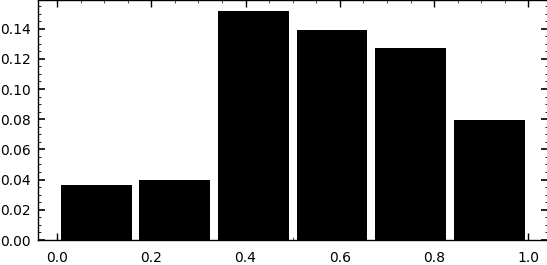

In [ ]:
n_bins=6

cutoffs = np.zeros(n_bins+1)
for i in range(0,n_bins+1):
    cutoffs[i] = i*(1/(n_bins))

midvals = np.zeros(n_bins)

for i in range(0,len(midvals)):
    midvals[i] = (cutoffs[i]+cutoffs[i+1])/2


print(cutoffs)

hist = pd.DataFrame(np.zeros((n_bins,4)),columns=['blls','fsrqs','rdgs','rdg_frac'])

for i in range(0,n_bins):
    for k in range(0,len(bllprobs)):
        if bllprobs[k] >= cutoffs[i] and bllprobs[k] < cutoffs[i+1]:
            hist['blls'][i] +=1
    for k in range(0,len(fsrqprobs)):
        if fsrqprobs[k] >= cutoffs[i] and fsrqprobs[k] < cutoffs[i+1]:
            hist['fsrqs'][i] +=1    
    for k in range(0,len(rdgprobs)):
        if rdgprobs[k] >= cutoffs[i] and rdgprobs[k] < cutoffs[i+1]:
            hist['rdgs'][i] +=1
        
    hist['rdg_frac'] = hist['rdgs']/(hist['blls']+hist['fsrqs'])   
        
hist['xs'] = midvals
plt.bar(midvals,hist['rdg_frac'],width=0.9*(1/n_bins))
plt.show()